In [24]:
import yfinance as yf
import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

[*********************100%%**********************]  8 of 8 completed


<Figure size 1400x800 with 0 Axes>

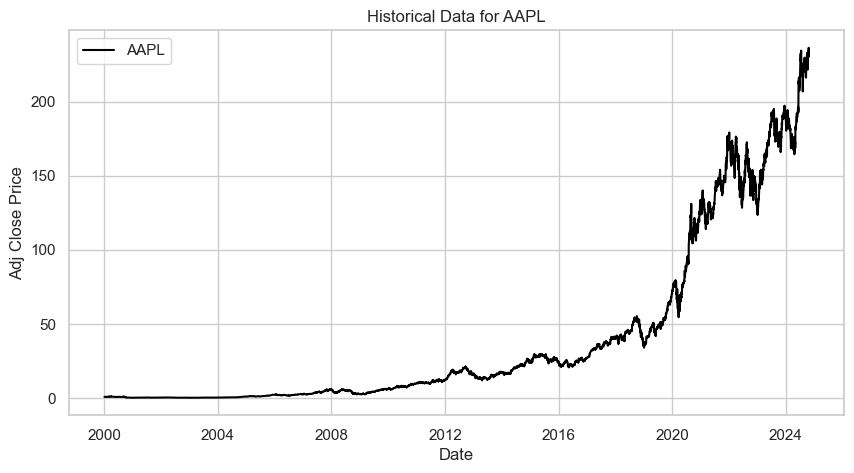

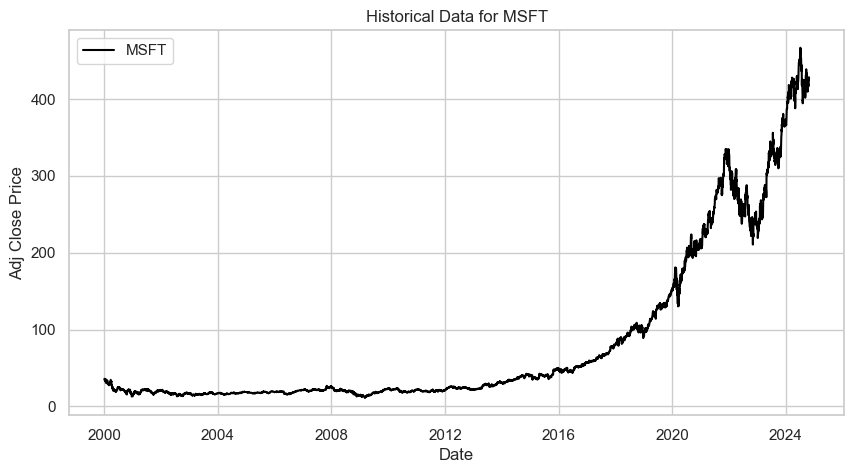

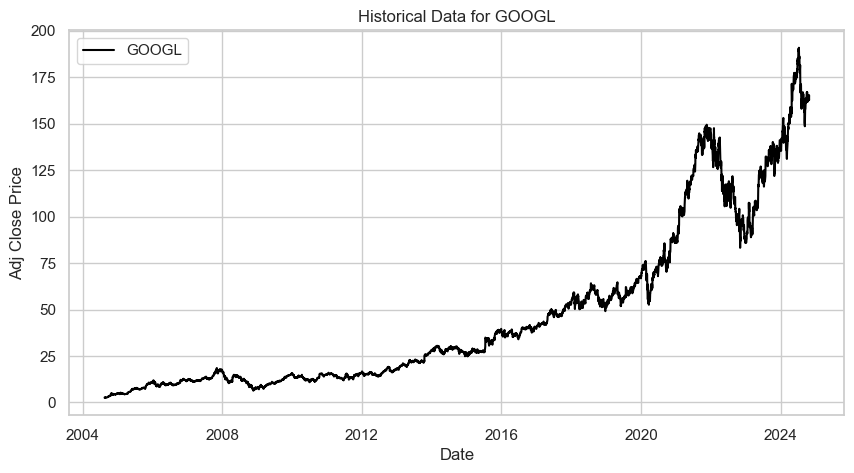

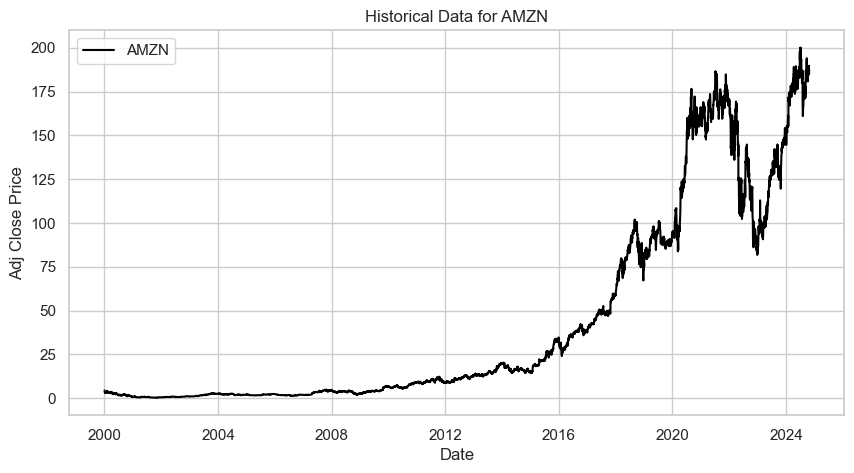

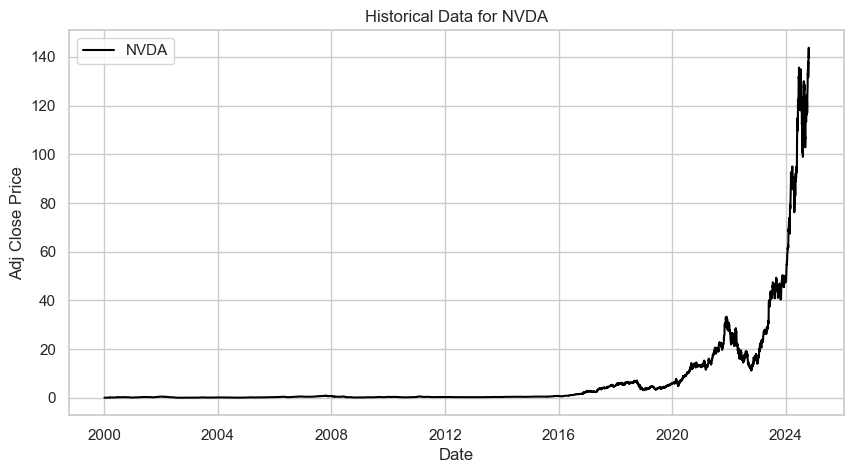

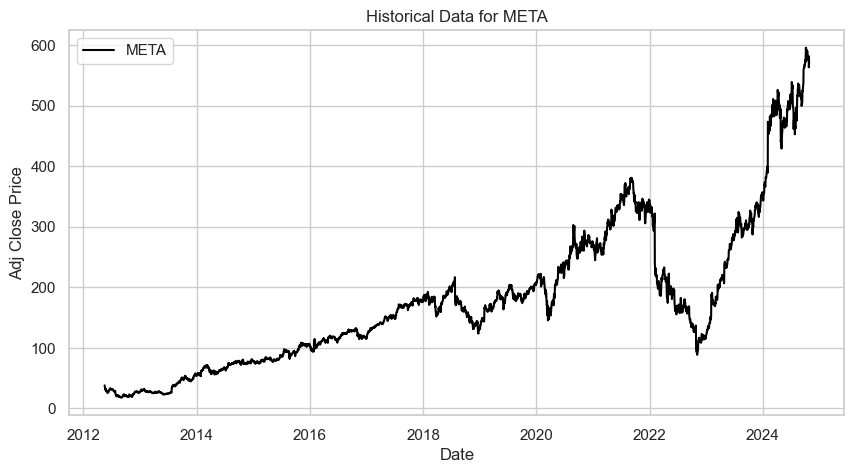

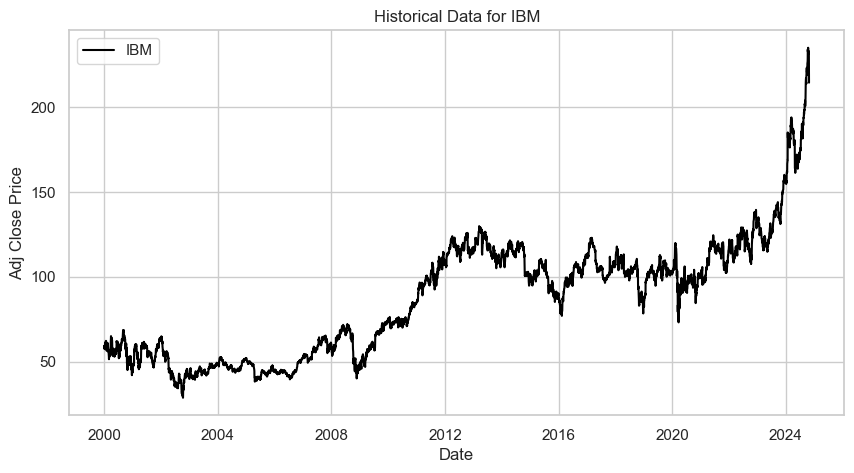

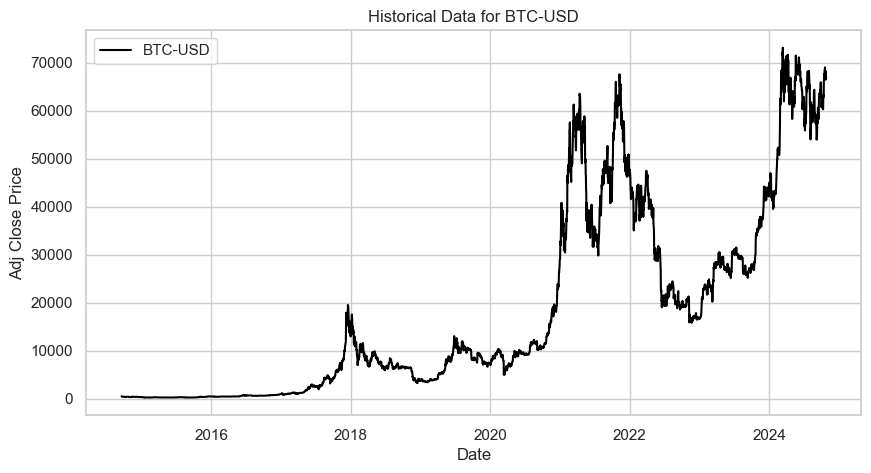

In [37]:
# Descargar los datos históricos de precios ajustados de cierre
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'IBM', 'BTC-USD']
Y_df = yf.download(tickers, start='2000-01-01', interval='1d')['Adj Close']

# Resetear el índice y transformar el DataFrame para prepararlo para gráficos individuales
Y_df = Y_df.reset_index().melt(id_vars='Date', var_name='unique_id', value_name='y')
Y_df = Y_df.rename(columns={'Date': 'ds'})
Y_df = Y_df[['unique_id', 'ds', 'y']]
Y_df = Y_df.dropna(subset=['y']).reset_index(drop=True)

# Graficar los datos históricos de cierre ajustado en negro para cada ticker
plt.figure(figsize=(14, 8))  # Tamaño de la figura general
for ticker in tickers:
    plt.figure(figsize=(10, 5))  # Tamaño individual para cada gráfico
    # Filtrar los datos para el ticker específico y obtener solo desde la primera fecha válida
    ticker_data = Y_df[Y_df['unique_id'] == ticker]
    plt.plot(ticker_data['ds'], ticker_data['y'], color='black', label=ticker)
    plt.title(f'Historical Data for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Adj Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()